In [3]:
import pickle as pk
import numpy as np
import math as mt
from os import walk
import statistics as st
from matplotlib import pyplot

In [14]:
poblaciones=[100]
archivo='high1e6final'
nbins=100
borders=[149000,159000]

In [15]:
##Totmeans & totvar are for statistical analysis, maxi is for graphics
maxi=0     
totvar=[]
totmeans=[]
for ni in poblaciones:
    midvar=[]
    midmean=[]
    mypath='D:\\datos_tesis\\'+archivo+'\\n'+str(ni)+'\\'
    f = []
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(filenames)
        break
    for filename in f:
        means=[]
        varianzas=[]
        data=[]
        counter=0
        llego=False
        with open(mypath+filename,'rb') as openfile:
            while (counter<borders[1]):
                try:
                   
                    dato=pk.load(openfile)
                    counter+=(len(dato)/ni)
                    if(counter>borders[0] and llego==False):
                        data.extend(dato[int(round(len(dato)-((counter-borders[0])*ni))):])
                        llego=True
                    elif(counter>borders[0]):
                        data.extend(dato)                    
                except EOFError:
                    break
            data=data[0:((borders[1]-borders[0])*ni)+1]
            if len(data)>0:
                means.append(st.mean(data))
                varianzas.append(st.variance(data))
                maxi=max([maxi,max(data)])
        if len(varianzas)>0:
            midvar.append(varianzas[0])
            midmean.append(means[0])
    totvar.append(midvar)
    totmeans.append(midmean)


In [16]:
allbins=[]
for ni in poblaciones:
    mypath='D:\\datos_tesis\\'+archivo+'\\n'+str(ni)+'\\'
    f = []
    #Make filename list(inside folder)
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(filenames)
        break
    #For each independent run
    histograma=np.zeros(nbins)
    for filename in f:
        data=[]
        counter=0
        llego=False
        #Open specific filename to fill data variable
        with open(mypath+filename,'rb') as openfile:
            while (counter<borders[1]):
                try:
                    dato=pk.load(openfile)
                    counter+=(len(dato)/ni)
                    if(counter>borders[0] and llego==False):
                        data.extend(dato[int(round(len(dato)-((counter-borders[0])*ni))):])
                        llego=True
                except EOFError:
                    break
        data=data[0:((borders[1]-borders[0])*ni)+1]   
        histograma=histograma+np.histogram(data,bins=nbins,range=(1,maxi))[0]
    allbins.append(histograma)

In [19]:
#Normalice by size
mini=10**10
for i in range(len(allbins)):
    mini=min([mini,sum(allbins[i])])
print(mini)

for i in range(len(allbins)):
    corr=mini/sum(allbins[i])
    for j in range(len(allbins[i])):
        allbins[i][j]=allbins[i][j]*corr

449910.0


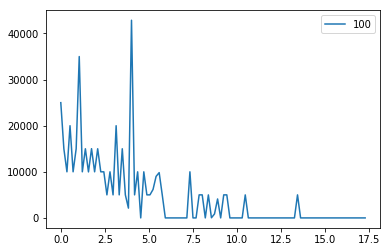

In [20]:
# Graph 
rbins=np.linspace(0,maxi,nbins)

i=0
for ni in poblaciones:
    pyplot.plot( rbins,allbins[i], label=str(ni))
    i+=1

pyplot.legend(loc='upper right')
pyplot.show()

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


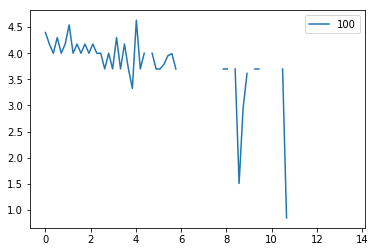

In [21]:
#Log Graph
i=0
for ni in poblaciones:
    pyplot.plot( rbins,np.log10(allbins[i]), label=str(ni))
    i+=1

pyplot.legend(loc='upper right')
pyplot.show()

In [22]:
meanOfMeans=[]
varOfMeans=[]
meanOfVars=[]
varOfVars=[]
count=0
for i in range(len(totmeans)):
    
   
    
    meanOfMeans.append(st.mean(totmeans[i]))
    varOfMeans.append(st.variance(totmeans[i]))
    
    meanOfVars.append(st.mean(totvar[i]))
    varOfVars.append(st.variance(totvar[i]))

In [23]:
print(meanOfMeans)
print(meanOfVars)
print(varOfMeans)
print(varOfVars)

[3.6268321955888463]
[0.13634307403686743]
[7.125961693667726]
[0.09742255822162185]


In [ ]:
# This Script is slow, ineficient, and has to be run for each individual timepoint to evaluate
# 'meanOfMeans' will give the required value for the selected interval so it can be later graphed